# Optimize Bitfarm with different kernel parameters

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
%matplotlib inline

In [2]:
# vriables:
n_bits = 30
n_iterations = 300
surrogate = GaussianProcessRegressor(kernel=Matern(nu=2.5, length_scale_bounds=[0.01, 0.1]),
                                     n_restarts_optimizer=5,
                                     random_state =1,
                                     normalize_y=True)

In [3]:
n_bits = n_bits
param_dict = {}
for i in range(n_bits):
    param_dict['x%s'%i] = [0, 1]
    
def objfunc(args_list):
    hyper_evaluated = []
    objective_evaluated = []
    for hyper_par in args_list:
        objective = sum([int(i) for i in hyper_par.values()])
        objective_evaluated.append(objective)
        hyper_evaluated.append(hyper_par)
    return hyper_evaluated, objective_evaluated

In [5]:
conf_Dict = dict()
conf_Dict['batch_size'] = 1
conf_Dict['num_iteration'] = n_iterations
conf_Dict['domain_size'] = 500
conf_Dict['initial_random']= 5
conf_Dict['surrogate'] = surrogate

In [6]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
print('Tuner Configuration')
print(tuner.getConf())

Tuner Configuration
{'param_dict': {'x0': [0, 1], 'x1': [0, 1], 'x2': [0, 1], 'x3': [0, 1], 'x4': [0, 1], 'x5': [0, 1], 'x6': [0, 1], 'x7': [0, 1], 'x8': [0, 1], 'x9': [0, 1], 'x10': [0, 1], 'x11': [0, 1], 'x12': [0, 1], 'x13': [0, 1], 'x14': [0, 1], 'x15': [0, 1], 'x16': [0, 1], 'x17': [0, 1], 'x18': [0, 1], 'x19': [0, 1], 'x20': [0, 1], 'x21': [0, 1], 'x22': [0, 1], 'x23': [0, 1], 'x24': [0, 1], 'x25': [0, 1], 'x26': [0, 1], 'x27': [0, 1], 'x28': [0, 1], 'x29': [0, 1]}, 'userObjective': <function objfunc at 0x117bea680>, 'domain_size': 500, 'initial_random': 5, 'num_iteration': 300, 'objective': 'maximize', 'batch_size': 1, 'optimizer': 'Bayesian', 'surrogate': GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=Matern(length_scale=1, nu=2.5),
                         n_restarts_optimizer=5, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=1)}


In [7]:
results = tuner.maximize()

In [8]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x0': 1, 'x1': 1, 'x10': 1, 'x11': 1, 'x12': 1, 'x13': 1, 'x14': 1, 'x15': 1, 'x16': 1, 'x17': 1, 'x18': 1, 'x19': 0, 'x2': 0, 'x20': 1, 'x21': 1, 'x22': 1, 'x23': 1, 'x24': 1, 'x25': 1, 'x26': 0, 'x27': 1, 'x28': 0, 'x29': 1, 'x3': 1, 'x4': 1, 'x5': 1, 'x6': 1, 'x7': 1, 'x8': 0, 'x9': 0}
best objective: 24


In [9]:
k = tuner.Optimizer.surrogate.kernel_

In [10]:
k.get_params()

{'length_scale': 0.10000000000000002,
 'length_scale_bounds': [0.01, 0.1],
 'nu': 2.5}

In [11]:
k([[1, 1]],[[1, 0]])

array([[3.69569622e-08]])

# Plotting the variation in the max objective

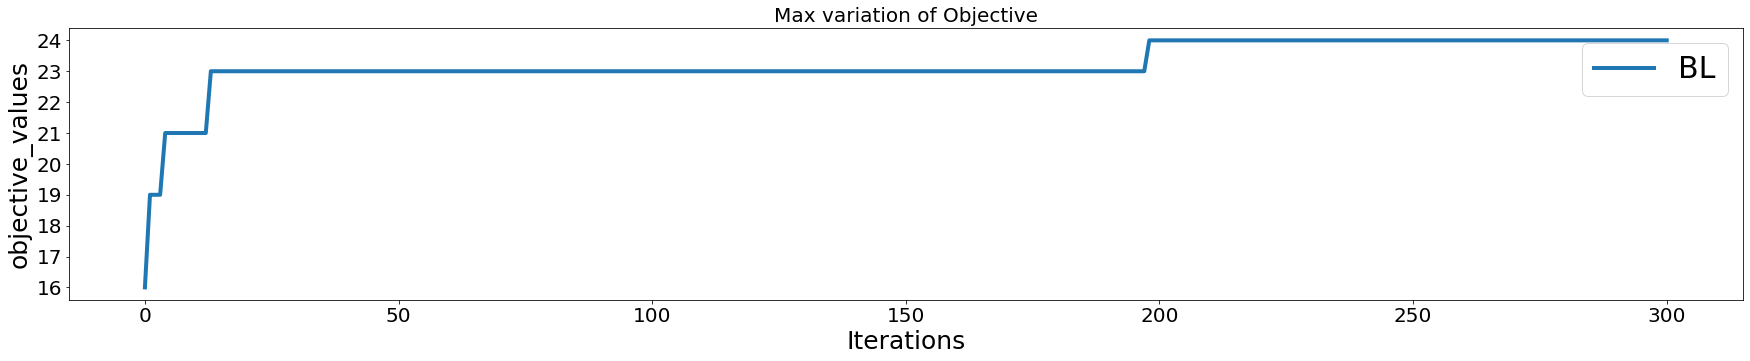

In [12]:
Size = 301 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the entire results

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)